## Adjusting Brightness and Contrast (Using Gamma Correction)

**Gamma correction** is used to adjust the brightness of an image using a **non-linear transformation** between input and output pixel values:

$$
O = \left(\frac{I}{255}\right)^{\gamma} \times 255
$$

- **\(I\)**: original pixel value  
- **\(O\)**: new pixel value after gamma correction  
- **\(\gamma\)**: gamma factor

> Because this transformation is **non-linear**, its effect is **not the same for all pixels** — it depends on the original pixel values.

- **\(\gamma < 1\)** → brightens the image  
- **\(\gamma > 1\)** → darkens the image


## Gamma Correction for an Underexposed Image

An **underexposed image** is too dark because not enough light was captured during image acquisition.  

**Gamma correction** can be used to brighten such images without simply adding a constant to all pixels. Since gamma correction is **non-linear**, it adjusts darker pixels more than brighter ones, producing a more natural-looking result.


- For underexposed images, choose **\(\gamma < 1\)** to increase brightness.  
- Dark areas become brighter, while already bright areas are preserved, avoiding overexposure.

> This method is much more effective than linear brightness adjustment for recovering details in dark images.


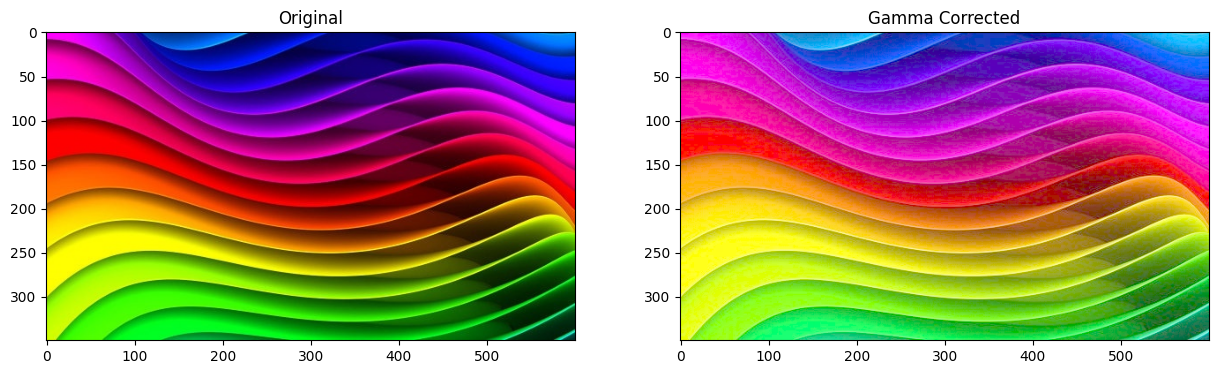

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set gamma value
gamma = 0.4  # <1 to brighten an underexposed image

# Read the original image
img_original = cv2.imread("images/alpha.jpg")

# Create a lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction using the lookup table
out = cv2.LUT(img_original, lookUpTable)

# Display original and corrected images side by side
plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.imshow(img_original[..., ::-1])  # Convert BGR → RGB
plt.title("Original")
plt.subplot(122)
plt.imshow(out[..., ::-1])
plt.title("Gamma Corrected")
plt.show()

### Explanation

- **`gamma = 0.4`**: brightens an underexposed image.  
  - Values **< 1** brighten the image, values **> 1** darken it.  
- **`lookUpTable`**: precomputes the gamma-corrected values for all pixel intensities (0–255) to make the process faster.  
- **`cv2.LUT()`**: applies the lookup table to the image efficiently, performing gamma correction on all pixels.  
- **`img[..., ::-1]`**: converts OpenCV’s **BGR** format to **RGB** for proper display in Matplotlib.  

> Gamma correction is generally more effective than simple linear brightness adjustments for enhancing dark or underexposed images because it brightens dark areas more naturally while preserving highlights.


## Comparison with the Linear Method (Brightness & Contrast Adjustment)

When we compare **gamma correction** with the previous **linear adjustment method** (`g(i,j) = α·f(i,j) + β`):

| Feature | Linear Method | Gamma Correction |
|---------|---------------|----------------|
| **Type of transformation** | Linear | Non-linear |
| **Effect on dark pixels** | All pixels are adjusted equally; dark pixels may remain too dark or get clipped | Dark pixels are brightened more than bright pixels, producing a natural result |
| **Effect on bright pixels** | Bright pixels may become saturated or clipped if β is large | Bright pixels are preserved, avoiding overexposure |
| **Control** | Simple: α for contrast, β for brightness | Flexible: γ controls how much to brighten or darken depending on pixel intensity |
| **Use case** | Simple brightness/contrast adjustment | Correcting underexposed or overexposed images, improving perceptual brightness |

> **Summary:** Linear adjustments are simpler but less adaptive. Gamma correction provides a **more perceptually accurate enhancement**, especially for images with uneven lighting or underexposure.


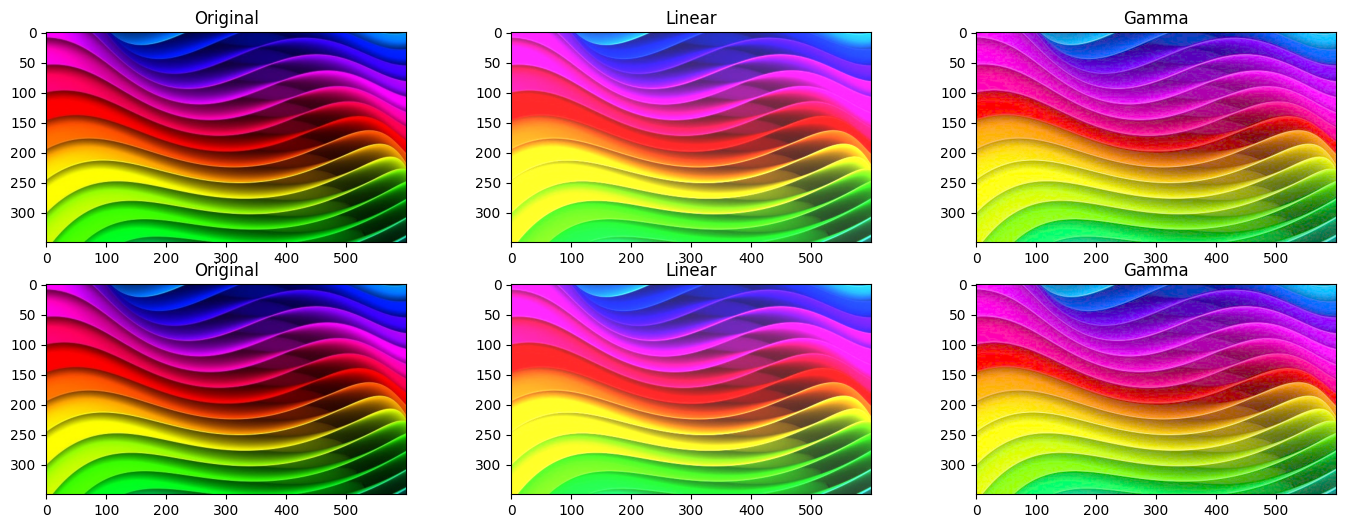

In [3]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set gamma value
gamma = 0.4  # Brightening factor for gamma correction

# Read two original images
img_original1 = cv2.imread("images/alpha.jpg")
img_original2 = cv2.imread("images/alpha.jpg")

# Apply linear brightness and contrast adjustment
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)

# Prepare lookup table for gamma correction
lookUpTable = np.empty((1, 256), np.uint8)
for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

# Apply gamma correction
output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)

# Display original, linear, and gamma-corrected images side by side
plt.figure(figsize=[17,6])

plt.subplot(231)
plt.imshow(img_original1[..., ::-1])
plt.title("Original")
plt.subplot(232)
plt.imshow(output_linear1[..., ::-1])
plt.title("Linear")
plt.subplot(233)
plt.imshow(output_gammacorrected1[..., ::-1])
plt.title("Gamma")

plt.subplot(234)
plt.imshow(img_original2[..., ::-1])
plt.title("Original")
plt.subplot(235)
plt.imshow(output_linear2[..., ::-1])
plt.title("Linear")
plt.subplot(236)
plt.imshow(output_gammacorrected2[..., ::-1])
plt.title("Gamma")

plt.show()

ُSource: https://docs.opencv.org/4.6.0/d3/dc1/tutorial_basic_linear_transform.html